# Student Performance Indicator

### Life Cycle Of Machine Learning Project

- Understanding the problem statement
- Data Collection
- Data Checks to Performs
- Exploratory data analysis
- Data Pre-processing
- model Traing 
- choose best model

# 1) Problem statement 
- this project understand how the student's performance (test score ) is affected by other variable such as Gender , Ethnicity ,Parental level of education , Lunch and Test Preparation course

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.


# 2.1 Import Data and Required Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

# import data 

In [2]:
df = pd.read_csv("data/stud.csv")

## top 5 record


In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## shape of dataset

In [4]:
df.shape

(1000, 8)

## 2.2 Dataset Inforamtion
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

# 3. Data Chcek to perform

- Check missing values 
- Check Duplicate
- Check DataType    
- Check the number of unique values in each column
- Check the statistics of dataset
- Check the various categorical present in different categorical columns

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## there are no missing values

In [6]:
df.duplicated().sum()

np.int64(0)

## there are no missings values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

## 3.4 checking the number of unique values in each columns


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight

- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

# 3.7 Exploratoy Data

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Category in 'gender':  ",df["gender"].unique())

print("Category in 'race_ethnicity':  ",df["race_ethnicity"].unique())

print("Category in 'parental_level_of_education':  ",df["parental_level_of_education"].unique())

print("Category in 'lunch':  ",df["lunch"].unique())

print("Category in 'test_preparation_course':  ",df["test_preparation_course"].unique())


Category in 'gender':   ['female' 'male']
Category in 'race_ethnicity':   ['group B' 'group C' 'group A' 'group D' 'group E']
Category in 'parental_level_of_education':   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Category in 'lunch':   ['standard' 'free/reduced']
Category in 'test_preparation_course':   ['none' 'completed']


### define numberical and categorical values

In [13]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numerical_feature = [feature for feature in df.columns if df[feature].dtype !='O']

# print
print('We have {} numerical features : {} '.format(len(numerical_feature),numerical_feature))
print('We have {} categorical features : {} '.format(len(categorical_features),categorical_features))


We have 3 numerical features : ['math_score', 'reading_score', 'writing_score'] 
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 3.8 Addings Columns for "total_score" and "Average"

In [15]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] = df["total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


##### Number of student which full mark in different subject and also backbencher who obtain less than 20  marks

In [16]:
reading_full = df[df["reading_score"] == 100]["average_score"].count()
math_full = df[df["math_score"] == 100]["average_score"].count()
writing_full = df[df["writing_score"] == 100]["average_score"].count()

print(f"Number of Student Who Scored Full Mark in Math : {math_full}")
print(f"Number of Student Who Scored Full Mark in Reading : {reading_full}")
print(f"Number of Student Who Scored Full Mark in Writing: {writing_full}")


Number of Student Who Scored Full Mark in Math : 7
Number of Student Who Scored Full Mark in Reading : 17
Number of Student Who Scored Full Mark in Writing: 14


### Insights

- from above values we get student have performed the worst in math
- Best performance is in reading section

# 4. Explorings Data (visulation )

 #### 4.1 Visulization average score distribution to make some conclusion

- Histogram
- Kernel distribution Function (KDE)

# 4.1.1 Histrogram & KDE 

<Axes: xlabel='average_score', ylabel='Count'>

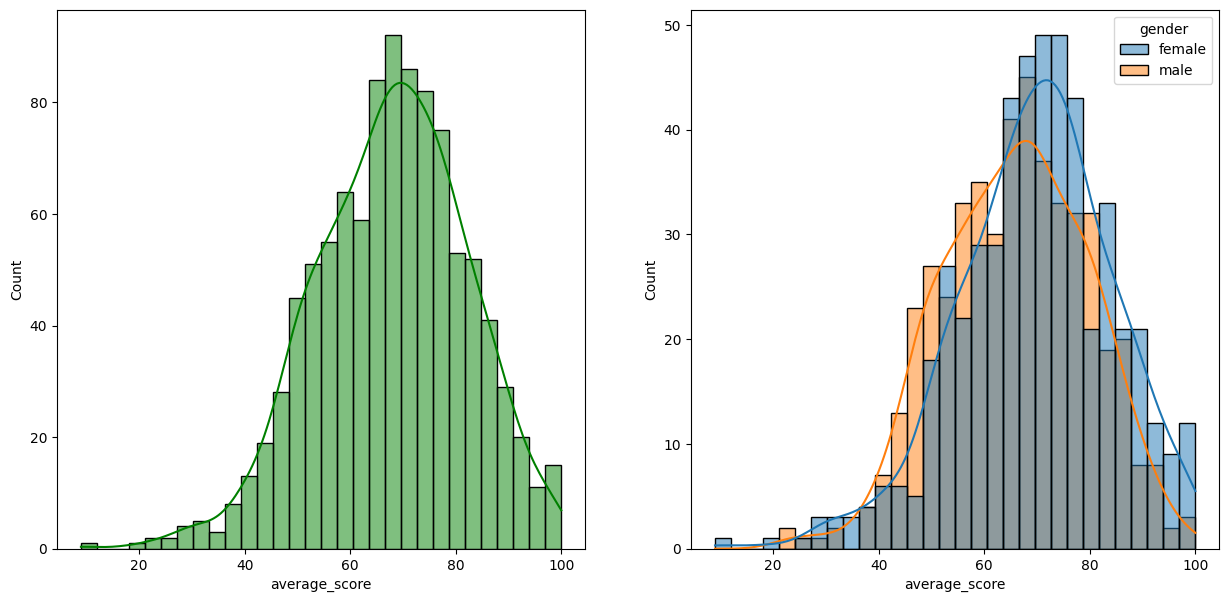

In [17]:
fig , ax = plt.subplots(1 , 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="average_score",bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="average_score",hue="gender",bins=30,kde=True)

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='total_score', ylabel='Count'>

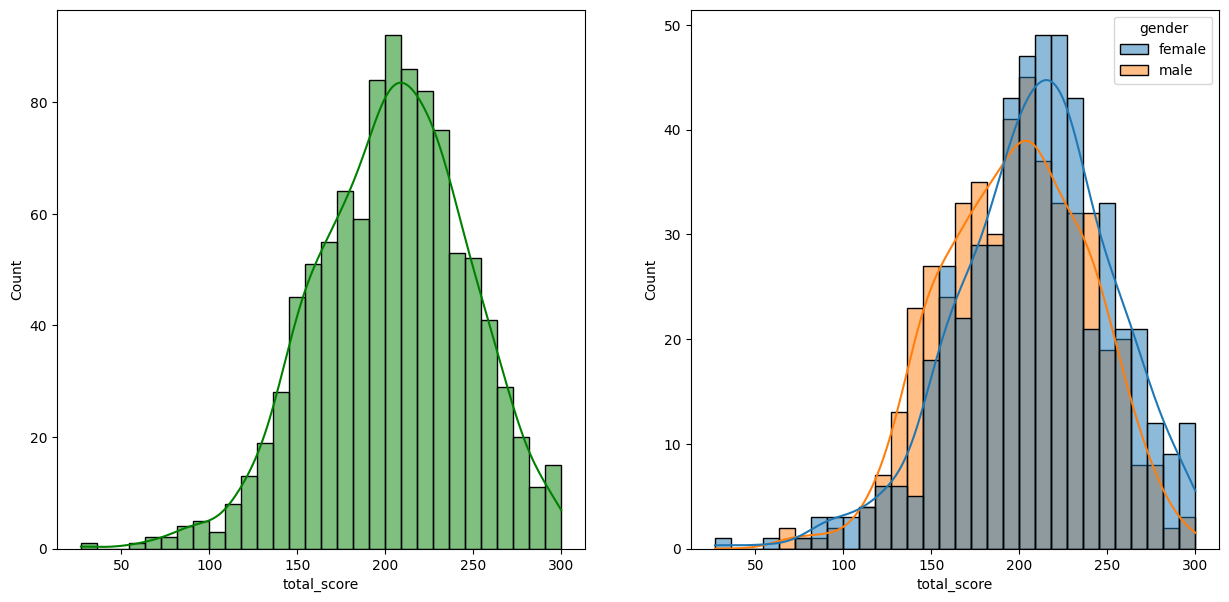

In [19]:
fig , ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="total_score",kde=True,bins=30,color="g")
plt.subplot(122)
sns.histplot(data=df,x='total_score',hue="gender",kde=True,bins=30)

#### Insight
- Female student  tend to perform  well than male student


<Axes: xlabel='average_score', ylabel='Count'>

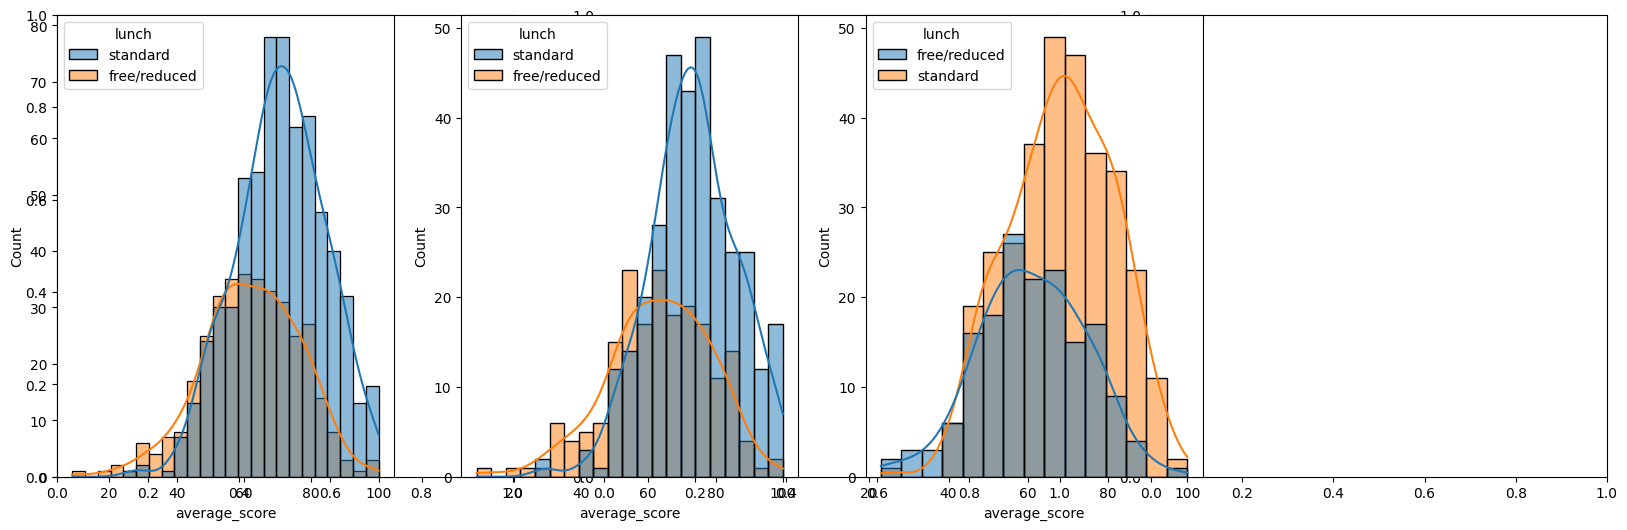

In [20]:
plt.subplots(1,3,figsize=(20,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=="female"],x="average_score",kde=True,hue="lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="average_score",kde=True,hue="lunch")


In [21]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


#### Insights
- Standard lunch helps perform well in exams
- Standard lunch helps perform well in exam be it male or female

<Axes: xlabel='average_score', ylabel='Count'>

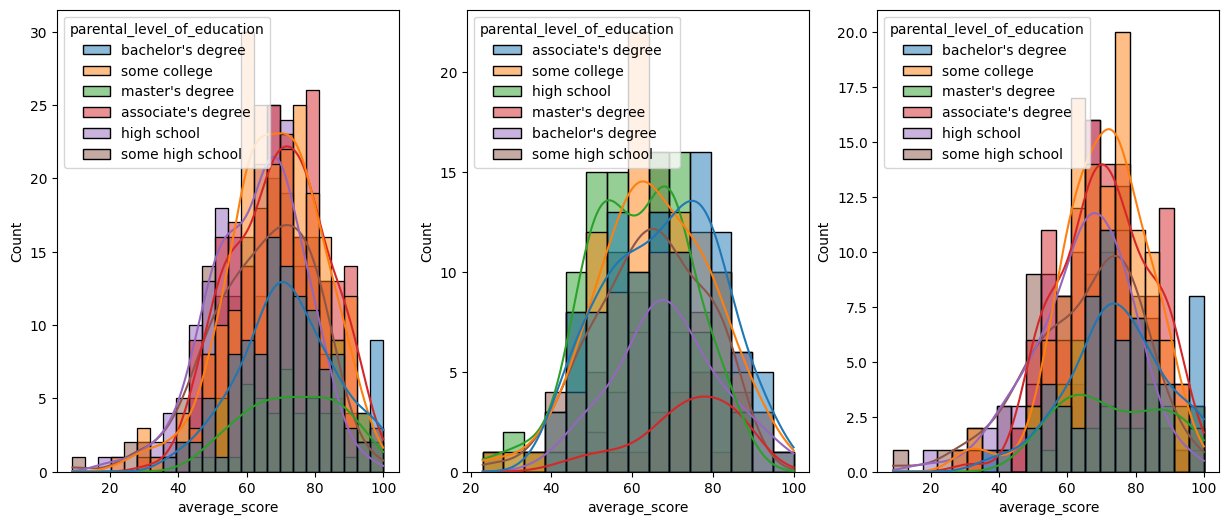

In [22]:
plt.subplots(1,3,figsize=(15,6))
plt.subplot(131)
sns.histplot(data=df,x="average_score",hue="parental_level_of_education",kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=="male"], x="average_score",hue="parental_level_of_education",kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=="female"],x="average_score",hue="parental_level_of_education",kde=True)

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

In [23]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [24]:
df.race_ethnicity.unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

<Axes: xlabel='average_score', ylabel='Count'>

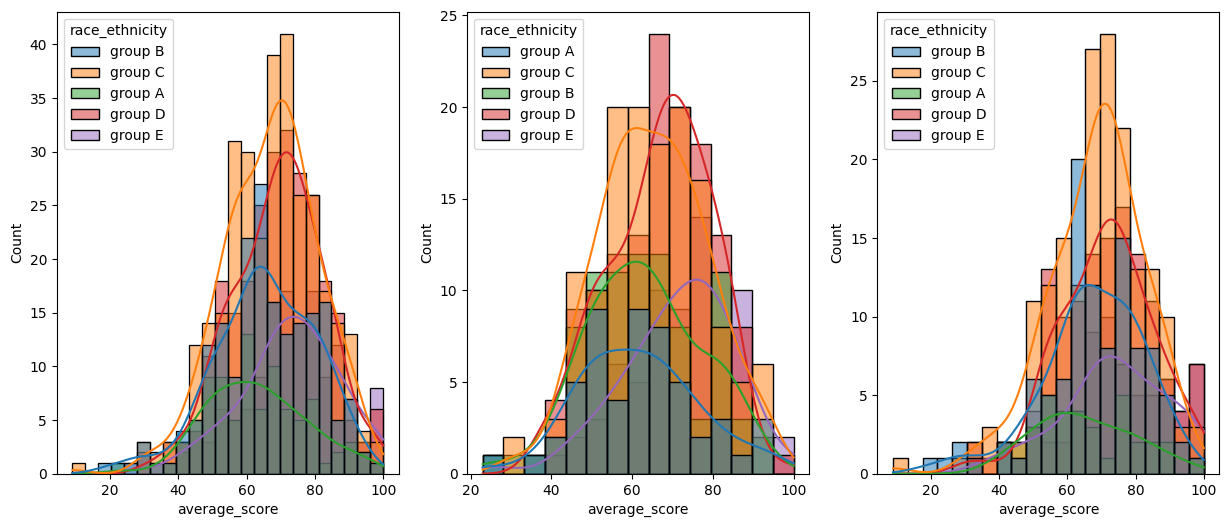

In [25]:
plt.subplots(1,3,figsize=(15,6))
plt.subplot(131)
sns.histplot(data=df,x="average_score",hue="race_ethnicity",kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=="male"],x="average_score",hue="race_ethnicity",kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=="female"],x="average_score",hue="race_ethnicity",kde=True)

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

## Most of student score  in all three subject

<Axes: ylabel='writing_score'>

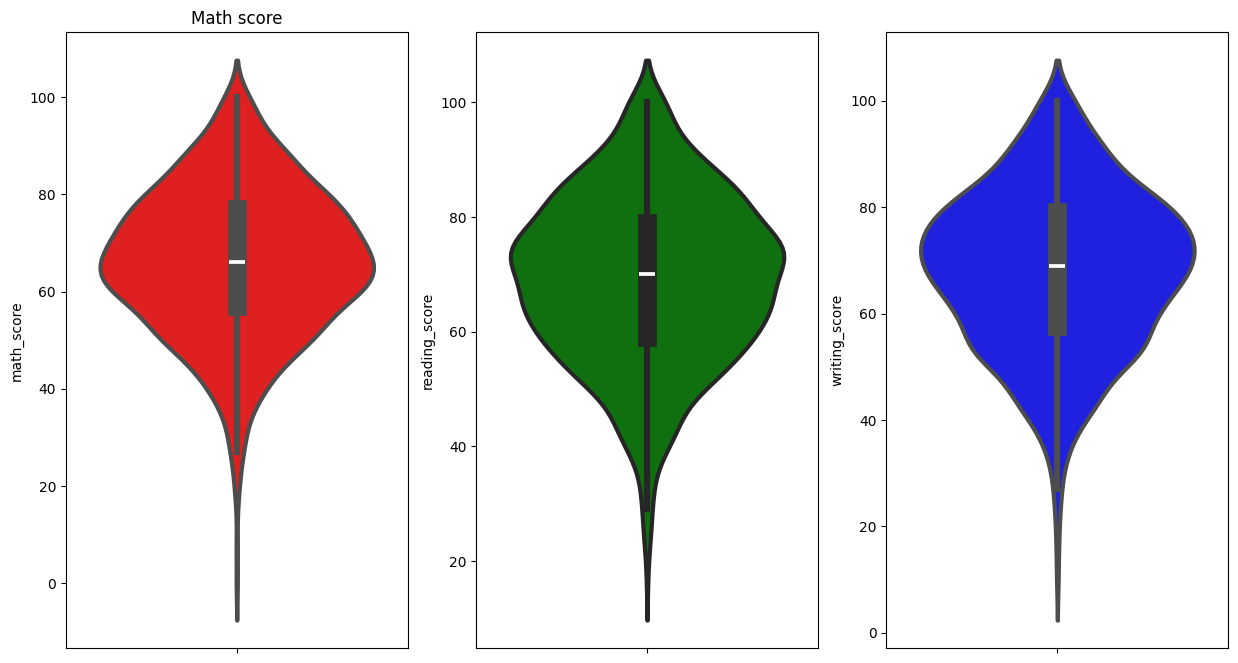

In [26]:
plt.subplots(1,3,figsize=(15,8))
plt.subplot(131)
plt.title("Math score")
sns.violinplot(y="math_score",data=df,color='red',linewidth=3)
plt.subplot(132)
sns.violinplot(data=df,y='reading_score',color="green",linewidth=3)
plt.subplot(133)
sns.violinplot(data=df,y="writing_score",color="blue",linewidth=3)

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

In [27]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [28]:
size = df["parental_level_of_education"].value_counts()
size

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

### 4.3 Multivaritate analysis using pieplot

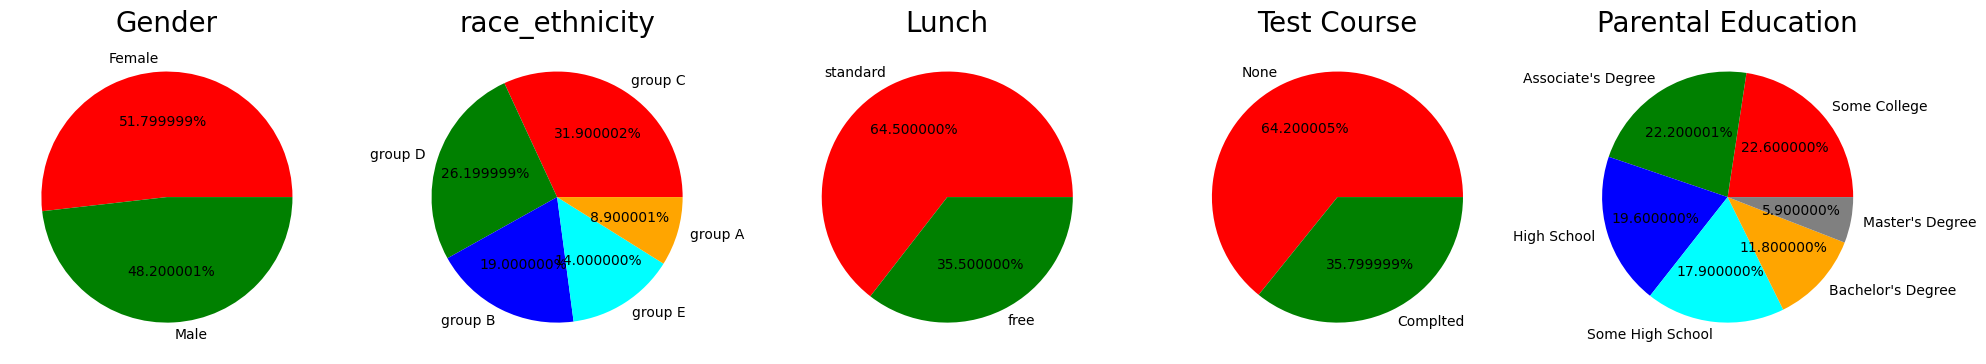

In [33]:
plt.subplots(1,5,figsize=(20,6))
plt.subplot(151)

size = df["gender"].value_counts()
labels = 'Female','Male'
color = ['red','green']
plt.pie(size,colors=color,labels=labels , autopct='%2f%%')
plt.title("Gender",fontsize = 20)

plt.subplot(152)
size = df["race_ethnicity"].value_counts()
labels = "group C","group D","group B","group E","group A"
colors=['red','green',"blue","cyan","orange"]
plt.pie(size,colors=colors,labels=labels,autopct="%2f%%")
plt.title("race_ethnicity",fontsize = 20)
plt.axis("off")

plt.subplot(153)
size = df["lunch"].value_counts()
labels ="standard","free"
colors = ["red","green"]
plt.pie(size,colors=colors,labels=labels,autopct="%2f%%")
plt.axis("off")
plt.title("Lunch",fontsize = 20)

plt.subplot(154)
size = df['test_preparation_course'].value_counts()
labels = "None","Complted"
colors = ['red',"green"]
plt.pie(size,colors=colors,labels=labels,autopct="%2f%%")
plt.title("Test Course",fontsize=20)
plt.axis("off")

plt.subplot(155)
size = df["parental_level_of_education"].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
colors = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size,colors=colors,labels=labels,autopct="%2f%%")
plt.title("Parental Education",fontsize=20)
plt.axis("off")


plt.tight_layout()
plt.grid()
plt.show()







#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

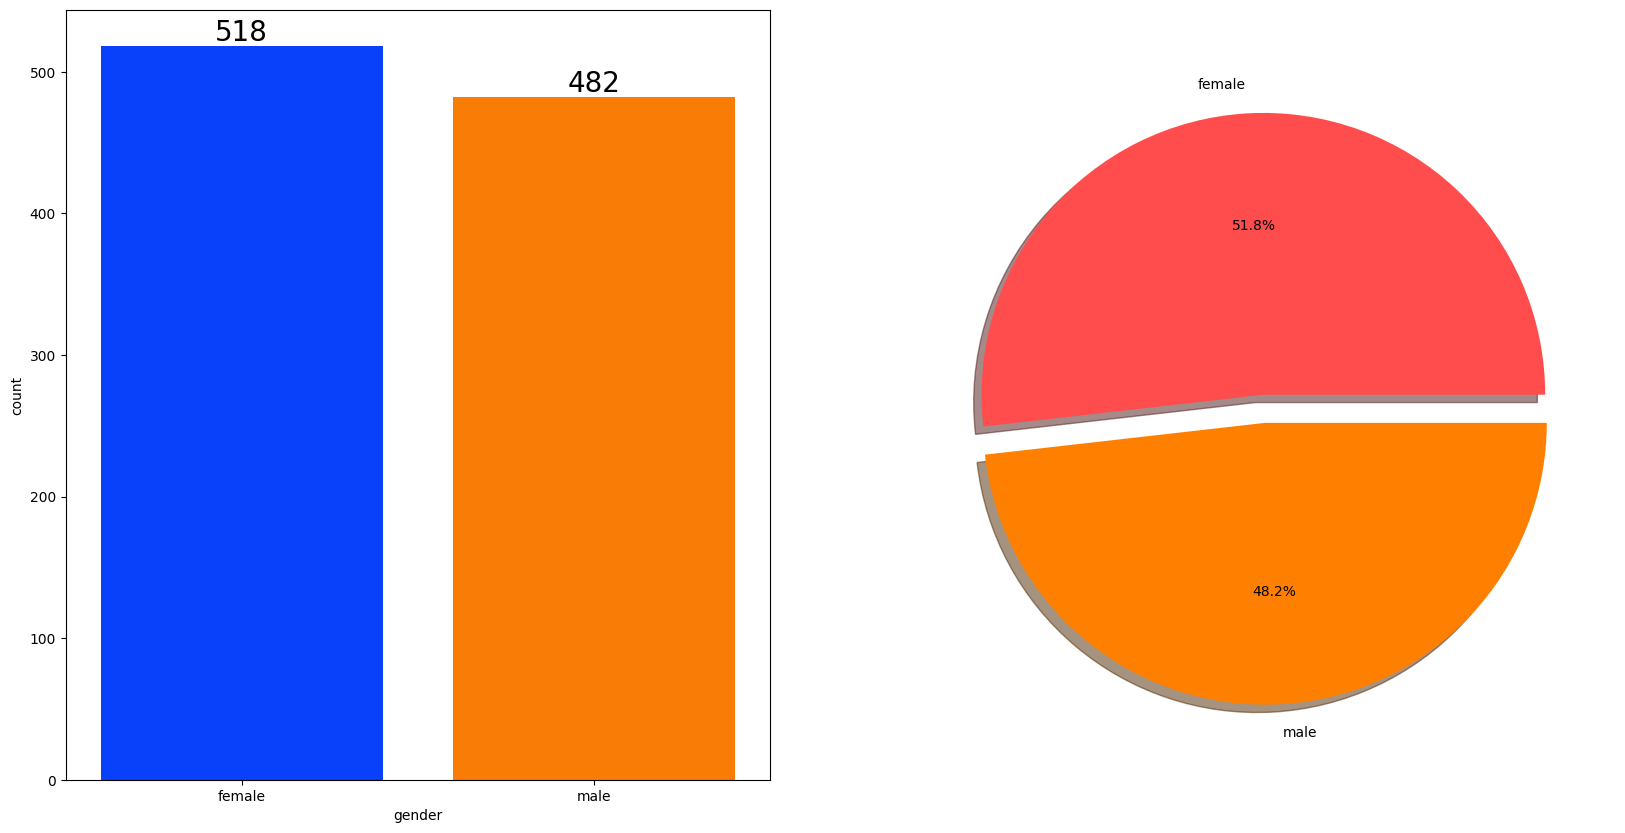

In [54]:
f , ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=df,x=df["gender"],saturation=0.95,palette='bright',ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['female','male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 